# Title

# Lib Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
import streamlit as st


st.write(
'''
# Hello World
'''
)

2021-04-30 17:38:28.373 WARNING root: 
  command:

    streamlit run /usr/local/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py [ARGUMENTS]


# Data Collection

In [3]:
youtube_path = '../data/US_youtube_trending_data.csv'

youtube = pd.read_csv(youtube_path)

df = pd.DataFrame(youtube)
df_0 = df.copy()

## todos

In [4]:
# add api

# Data Processing 

## Clean 

In [5]:
# inspect data
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [6]:
# add missing category str column
df['category'] = ''

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50791 entries, 0 to 50790
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           50791 non-null  object
 1   title              50791 non-null  object
 2   publishedAt        50791 non-null  object
 3   channelId          50791 non-null  object
 4   channelTitle       50791 non-null  object
 5   categoryId         50791 non-null  int64 
 6   trending_date      50791 non-null  object
 7   tags               50791 non-null  object
 8   view_count         50791 non-null  int64 
 9   likes              50791 non-null  int64 
 10  dislikes           50791 non-null  int64 
 11  comment_count      50791 non-null  int64 
 12  thumbnail_link     50791 non-null  object
 13  comments_disabled  50791 non-null  bool  
 14  ratings_disabled   50791 non-null  bool  
 15  description        50407 non-null  object
 16  category           50791 non-null  objec

In [8]:
# loop through category columnn, map int ids to str values, calc totals

cat_list = ['Autos & Vehicles', 'Film & Animation', 'Music', 'Pets & Animals', 
             'Sports', 'Travel & Events', 'Gaming', 'People & Blogs', 'Comedy', 
             'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 
             'Science & Technology', 'Nonprofits & Activism']

for i,cat in enumerate(df.iterrows()):
    if cat[1].categoryId == 2:
        df.loc[i,'category'] = cat_list[0]
    elif cat[1].categoryId == 1:
        df.loc[i,'category'] = cat_list[1]
    elif cat[1].categoryId == 10:
        df.loc[i,'category'] = cat_list[2]
    elif cat[1].categoryId == 15:
        df.loc[i,'category'] = cat_list[3]
    elif cat[1].categoryId == 17:
        df.loc[i,'category'] = cat_list[4]
    elif cat[1].categoryId == 19:
        df.loc[i,'category'] = cat_list[5]
    elif cat[1].categoryId == 20:
        df.loc[i,'category'] = cat_list[6]
    elif cat[1].categoryId == 22:
        df.loc[i,'category'] = cat_list[7]
    elif cat[1].categoryId == 23:
        df.loc[i,'category'] = cat_list[8]
    elif cat[1].categoryId == 24:
        df.loc[i,'category'] = cat_list[9]
    elif cat[1].categoryId == 25:
        df.loc[i,'category'] = cat_list[10]
    elif cat[1].categoryId == 26:
        df.loc[i,'category'] = cat_list[11]
    elif cat[1].categoryId == 27:
        df.loc[i,'category'] = cat_list[12]
        
    elif cat[1].categoryId == 28:
        df.loc[i,'category'] = cat_list[13]
    elif cat[1].categoryId == 29:
        df.loc[i,'category'] = cat_list[14]

df.category.value_counts()

Music                    10425
Entertainment            10202
Gaming                    6429
Sports                    5772
People & Blogs            4299
Comedy                    2895
Science & Technology      2111
Howto & Style             2110
News & Politics           2058
Film & Animation          1956
Education                 1076
Autos & Vehicles           929
Pets & Animals             310
Travel & Events            188
Nonprofits & Activism       31
Name: category, dtype: int64

In [9]:
# refactor conditional for loop

cat_list = ['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 
             'Sports', 'Travel & Events', 'Gaming', 'People & Blogs', 'Comedy', 
             'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 
             'Science & Technology', 'Nonprofits & Activism']

cat_ids = [1,2,10,15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]

category_dict =  dict(zip(cat_ids, cat_list))

for i in range(len(df_0.index)):
    ind = df_0.loc[i, 'categoryId']
    df_0.loc[i, 'cat_labels'] = category_dict[ind]
    
df_0['cat_labels'].value_counts()

Music                    10425
Entertainment            10202
Gaming                    6429
Sports                    5772
People & Blogs            4299
Comedy                    2895
Science & Technology      2111
Howto & Style             2110
News & Politics           2058
Film & Animation          1956
Education                 1076
Autos & Vehicles           929
Pets & Animals             310
Travel & Events            188
Nonprofits & Activism       31
Name: cat_labels, dtype: int64

In [10]:
df_0.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,cat_labels
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


In [11]:
# reorder category column, place left of categoryId

def move_column(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

df = move_column(df,
                 cols_to_move=['category', 'categoryId'],
                 ref_col='publishedAt',
                 place='After')
df.head()

,video_id,title,publishedAt,category,categoryId,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,People & Blogs,22,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Gaming,20,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,Entertainment,24,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,Music,10,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Howto & Style,26,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [12]:
#isolate date 
for i, row in enumerate(df.publishedAt):
    df.loc[i, 'publishedAt'] = row[:10]
    
for i, row in enumerate(df.trending_date):
    df.loc[i, 'trending_date'] = row[:10]
    

In [13]:
# p is for published 
# t = trending 

#split in order to analyze y-y, m-m, and d-d changes 

# Split review dates by year, month and day (strings)
time_split = df.publishedAt.str.split('-', n=2, expand=True)
df['p_year'] = time_split[0]
df['p_month'] = time_split[1]
df['p_day'] = time_split[2]

# Convert review dates into a datetime object
dates = df.publishedAt
df.publishedAt = [d.date() for d in pd.to_datetime(dates)]

# Extract month and year from review dates
df['p_month_year'] = pd.to_datetime(df['publishedAt']).dt.to_period('M')

# Split review dates by year, month and day (strings)
time_split = df.trending_date.str.split('-', n=2, expand=True)
df['t_year'] = time_split[0]
df['t_month'] = time_split[1]
df['t_day'] = time_split[2]

# Convert review dates into a datetime object
dates = df.trending_date
df.trending_date = [d.date() for d in pd.to_datetime(dates)]


# Extract month and year from review dates
df['t_month_year'] = pd.to_datetime(df['trending_date']).dt.to_period('M')

In [14]:
df.head()


df.ratings_disabled.value_counts()

False    50463
True       328
Name: ratings_disabled, dtype: int64

### df1

In [15]:
df1 = df.copy()

df1 = df1[(df1.ratings_disabled == False) & (df1.comments_disabled == False)]

df1=df1.drop(['video_id','channelId','categoryId','thumbnail_link','comments_disabled','ratings_disabled','description'], axis=1)

df1.head()

,title,publishedAt,category,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,p_year,p_month,p_day,p_month_year,t_year,t_month,t_day,t_month_year
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,People & Blogs,Brawadis,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,2020,08,11,2020-08,2020,08,12,2020-08
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,Gaming,Apex Legends,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,2020,08,11,2020-08,2020,08,12,2020-08
2,I left youtube for a month and THIS is what ha...,2020-08-11,Entertainment,jacksepticeye,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,2020,08,11,2020-08,2020,08,12,2020-08
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,Music,XXL,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,2020,08,11,2020-08,2020,08,12,2020-08
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,Howto & Style,Mr. Kate,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,2020,08,11,2020-08,2020,08,12,2020-08


## Visualization

In [16]:
# plt.style.available

### Heatmap

In [17]:
# sns.heatmap

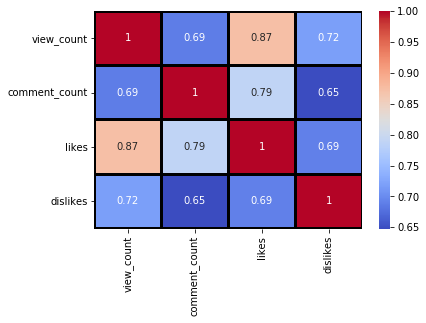

In [18]:
#review 

#positive correlation
#view count : likes highly correlated

correlation = df1[['view_count', 'comment_count', 'likes', 'dislikes']].corr()
sns.heatmap(correlation, annot=True, linewidths=2, linecolor='black', cmap="coolwarm")

### Top 10 Most Uploaded Categories & Channels

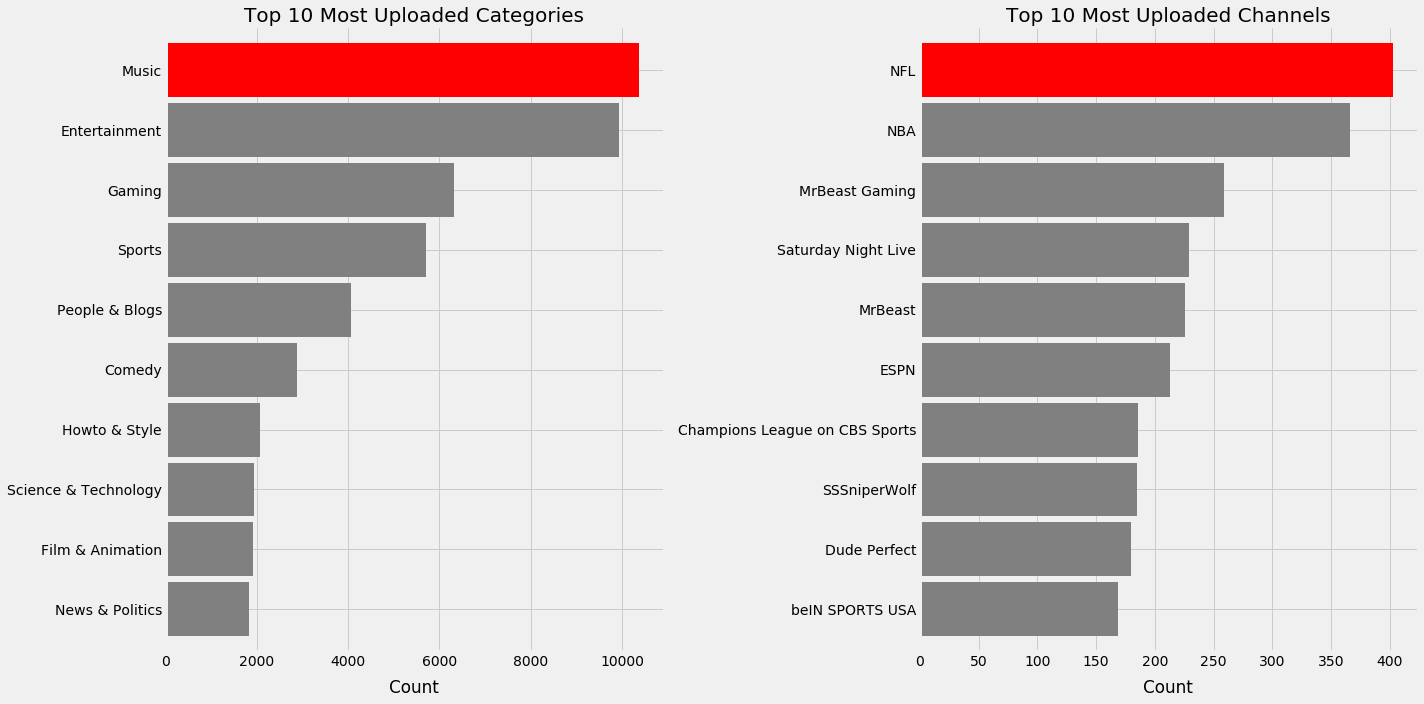

In [19]:
# todo - fix x axis '# of views'

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
pad = 10
# n = 3
# c = np.random.rand(n)

# plot 10 most viewed categories
ax1 = plt.subplot(1,2,1)


# sort top 10 category values 
top_cat = df1.category.value_counts()[:10].sort_values()

# set max color
cat_co = ['grey' if (x < max(top_cat)) else 'red' for x in top_cat ]

top_cat.plot(kind='barh', width=0.9, ax=ax1, color=cat_co)

# ax1.set_xlabel('Number of Views', labelpad=pad)
ax1.set_xlabel('Count', labelpad=pad)
ax1.set_title('Top 10 Most Uploaded Categories', fontsize=20)


# plot 10 most viewed channels 
ax2 = plt.subplot(1,2,2)

top_chan = df1.channelTitle.value_counts()[:10].sort_values()

# set max color
chan_co = ['grey' if (x < max(top_chan)) else 'red' for x in top_chan ]

top_chan.plot(kind='barh', width=0.9, ax=ax2, color=chan_co)


# ax2.set_xlabel('Number of Views', labelpad=pad)
ax2.set_xlabel('Count', labelpad=pad)
ax2.set_title('Top 10 Most Uploaded Channels', fontsize=20)

sns.despine(top=True, right=True)
plt.tight_layout()
# plt.show()

### df2

In [20]:
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12,5))


sns.countplot(x='category', data=df2, palette='icefire', dodge=False)
# sns.boxplot(x='view_count', y='category', data=df2, hue=df2['category'], orient="h")

plt.xticks(rotation=45)

plt.title('All Uploaded Videos by Category')
plt.ylim(0,None)
plt.tight_layout()

NameError: name 'df2' is not defined

<Figure size 864x360 with 0 Axes>

# Most Views 

In [ ]:
df2 = df1.copy()
df2 = df2.drop(['p_year','p_month','p_day','p_month_year','t_year','t_month','t_day','t_month_year','publishedAt','title','channelTitle','tags'], axis=1)

In [ ]:
byCat_nlargest = df2.groupby(by=['category'])['view_count'].sum().nlargest()

byCat_nlargest

# byCat = byCat.sum().styble.format('{0:,.0f}')

In [ ]:
byCat0 = df2.groupby('category').sum()

byCat = df2.groupby('category').sum().style.format('{0:,.0f}')

byCat.highlight_max(color='hsla(116, 68%, 64%, 1)')
byCat.highlight_min(color='hsla(2, 100%, 71%, 1)')


# def highlight(val):
#     yellow = 'background-color: yellow' if val > 1000**3.5 else ''
# #     yellow = 'background-color: yellow' if val >  else ''
#     return yellow

# byCat.applymap(highlight)

In [ ]:
# top_5 = top_cat.drop(['Autos & Vehicles','Science & Technology','Howto & Style','Comedy'])

# top_5

In [ ]:
# plt.style.available

In [ ]:
sns.boxplot

In [ ]:
df2_sorted = df2.sort_values('view_count', ascending=False)

# reset index bc category is the index due to groupby
df2_grouped = df2_sorted.groupby('category').sum().reset_index().sort_values('view_count', ascending=False)

In [ ]:
plt.style.use('default')

plt.figure(figsize=(12,5))

sns.barplot(x='category', y='view_count', data=df2_grouped, palette='rocket', dodge=False)

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,100000000000))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,10**10))
plt.xticks(rotation=45)
plt.ylim(0,None)
plt.tight_layout()

In [ ]:
sns.violinplot

In [ ]:
df2_sorted.info()

In [ ]:
data=df2_sorted
plt.style.use('default')
plt.figure(figsize=(12,5))

# y_values = data["view_count"].values


sns.boxplot(
    x='view_count', 
    y='category', 
    data=data, 
#     hue=df2_sorted['category'], 
    showfliers=False,
    linewidth=.5, 
    palette='Paired', 
    dodge=False, 
    whis=1.5,
    orient='h',
)


sns.despine(offset=10, trim=True)

plt.xlim(0,None)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(12,10))

# plot average views per category 
ax = df1.groupby('category').view_count.mean().sort_values().plot.barh(width=0.9)
ax.set_title('Average Views per Category', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# xreate a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()


In [ ]:
# data=df2_sorted
# plt.style.use('default')
# plt.figure(figsize=(12,12))

# sns.violinplot(
#     x='category', 
#     y='view_count', 
# #     y=np.log('view_count'),
#     data=data, 
#     linewidth=.5, 
#     palette='Paired',
#     dodge=False, 
#     orient='v',
#     style='whitegrid',
#     cut=0,
#     gridsize=100
# )

# #     inner='stick',
# #     bw=.2,
# #     scale_hue=False


# sns.despine(offset=10, trim=True)

# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,10**4))
# plt.ylim(0,None)
# plt.xticks(rotation=45)
# plt.tight_layout()

In [ ]:
# highest view_count by item

df2.sort_values('view_count', ascending=False)

### API

In [ ]:
df.index[3358]

# df.iloc[3358,:]

df.iloc[3358,[0,5]]

In [ ]:
# from youtube_statistics import youTubeStats
from config import API_KEY

class youTubeStats:

    def __init__(self, api_key, channel_id):
        self.api_key = api_key
        # assert isinstance(channel_id, object)
        self.channel_id = channel_id

    # noinspection PyTypeChecker
    def get_channel_stats(self) -> object:
        payload = 'snippet,statistics,status'
        channels = 'https://www.googleapis.com/youtube/v3/channels'
        url = f'{channels}?id={self.channel_id}&key={self.api_key}&part={payload}'
        print(url)



channel_id0: str = 'UCvtRTOMP2TqYqu51xNrqAzg'

youtube = youTubeStats(API_KEY, channel_id0)
youtube.get_channel_stats()

In [ ]:
# df2_sorted.sort_values('view_count', ascending=True).groupby(['category']).apply(lambda x: x.sort_values(['view_count'], ascending=False))
# bySorted_views = df2.groupby(['category']).apply(lambda x: x.sort_values(['view_count'], ascending=False))


# bySorted_views
# bySorted_views.reset_index(drop=True)


In [ ]:
df1.groupby('title').view_count.sum()

## 20% of vids viewed at most a million times 
## 75% of vids viewed at most 10 million times 


In [ ]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    

    # y-data for the ECDF: y
    
    y = np.arange(1, n + 1) / n

    return x, y

plt.figure(figsize=(20,5))


# Plot cumulative distribution of views per video
x, y = ecdf(df1.groupby('title').view_count.sum())

ax2 = plt.subplot(1,2,1)
ax2.set_xlabel('Amount of Views')

ax2.plot(x, y, marker='.', linestyle='none')
ax2.set_xscale('log');
ax2.set_title('Cumulative Distribution of Views per Video', fontsize=18)


# plt.show()

### 55% of all channels have been views 10^7 (10 Million)

In [ ]:
plt.figure(figsize=(20,5))
plt.style.use('default')

# Plot cumulative distribution of views per channel 
x, y = ecdf(df1.groupby('channelTitle').view_count.sum())

ax3 = plt.subplot(1,2,2)
ax3.set_xlabel('Amount of Views')
ax3.plot(x, y, marker='.', linestyle='none')
ax3.set_xscale('log');
ax3.set_title('Cumulative Distribution of Views per Channel', fontsize=18)

plt.scatter(10**7, .55, color='red', marker='D', s=100)
# plt.annotate("Point 1", (10**7, .55))
plt.grid()
sns.despine(top=True, right=True)
plt.tight_layout()

### Top 15 Channels with highest views 

In [ ]:
# add style 

In [ ]:
plt.figure(figsize=(12,10))
plt.style.use('fivethirtyeight')

# average views per channel
ax = df1.groupby('channelTitle').view_count.mean().sort_values()[-15:].plot.barh(width=0.9)
ax.set_title('Average Views per Channel', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

# plt.show()

### fig 2 – Average Views per Category

### fig 3 Average Comments per Category

In [ ]:
plt.figure(figsize=(12,10))

# Plot average 
ax = df1.groupby('category').comment_count.mean().sort_values().plot.barh(width=0.9)
ax.set_title('Average Comments per Category', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()

### fig 4 Average Views per Video

In [ ]:
# # add colors fo each colors
# plt.figure(figsize=(12,10))

# # Plot average views per title
# ax = df1.groupby(['title','category']).view_count.mean().sort_values()[:15].plot.barh(width=0.9)
# ax.set_title('Average Views per Video', fontsize=15)
# ax.set_ylabel('')
# ax.set_xlabel('Average View')
# sns.despine(top=True, right=True)

# # Create a list to collect the plt.patches data
# totals = []

# # Find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())

# # Set individual bar lables using above list
# total = sum(totals)

# # Set individual bar lables using above list
# for i in ax.patches:
#     # Get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_width()-0.5, i.get_y()+.3, \
#             str(round((i.get_width()), 2)), fontsize=15,
# color='black')

# plt.show()


In [ ]:
# review how to incorporate title

# for i, cat in enumerate(cat_list):
#     correlation = df1[df1.category == cat][['view_count', 'comment_count', 'likes', 'dislikes']].corr()
#     sns.heatmap(correlation)
#     plt.show()

In [ ]:




p_grouped = df1.groupby('p_month_year').mean().reset_index()
t_grouped = df1.groupby('t_month_year').mean().reset_index()



In [ ]:
type(p_grouped.p_month_year.dt.month[0])

In [ ]:
p_grouped.p_month_year = str(p_grouped.p_month_year)
t_grouped.t_month_year = str(t_grouped.t_month_year)

p_grouped.p_month_year[0] = '202008'
p_grouped.p_month_year[1] = '202009'
p_grouped.p_month_year[2] = '202008'
p_grouped.p_month_year[3] = '202010'
p_grouped.p_month_year[4] = '202011'
p_grouped.p_month_year[5] = '202012'
p_grouped.p_month_year[6] = '202101'
p_grouped.p_month_year[7] = '202102'
p_grouped.p_month_year[8] = '202103'
# p_grouped.p_month_year[9] = '2021-04'

p_grouped.p_month_year = pd.to_datetime(p_grouped.p_month_year)

t_grouped.t_month_year[0] = '2020-08'
t_grouped.t_month_year[1] = '2020-09'
t_grouped.t_month_year[2] = '2020-08'
t_grouped.t_month_year[3] = '2020-10'
t_grouped.t_month_year[4] = '2020-11'
t_grouped.t_month_year[5] = '2020-12'
t_grouped.t_month_year[6] = '2021-01'
t_grouped.t_month_year[7] = '2021-02'
t_grouped.t_month_year[8] = '2021-03'
# t_grouped.t_month_year[9] = '2021-04'

In [ ]:
# df['col_name'] = pd.to_numeric(df['col_name'], errors='coerce')


#bug 

plt.plot('p_month_year', 'view_count', data=p_grouped, linewidth=2)

# p_grouped.reset_index(inplace=True)

# p_grouped['p_month_year'] = pd.datetime.timestamp(df.p_month_year)
# p_grouped.set_index('month_year', inplace=True)

# plt.figure()

# ax1 = plt.subplot(2,2,1)

# ax1.plot('t_month_year', 'view_count', data=t_grouped, linewidth=2)


# ax2 = plt.subplot(2,2,2)
# ax2.plot('p_month_year', 'comment_count', data=p_grouped, linewidth=2)
# ax2.plot('t_month_year', 'comment_count', data=p_grouped, linewidth=2)

# ax3 = plt.subplot(2,2,3)
# ax3.plot('p_month_year', 'likes', data=p_grouped, linewidth=2)
# ax3.plot('t_month_year', 'likes', data=p_grouped, linewidth=2)

# ax4 = plt.subplot(2,2,4)
# ax4.plot('p_month_year', 'dislikes', data=p_grouped, linewidth=2)
# ax4.plot('t_month_year', 'dislikes', data=p_grouped, linewidth=2)

plt.show()


In [ ]:
# create line graph 
#x
p_grouped



In [ ]:

grouped = df1.groupby(['category']).sum()

# stacked bar graph by category to show

grouped.T.reset_index()


In [ ]:
# show the change in average views/counts/l/d for published and trending  

df1.groupby('p_month_year').mean().reset_index()
df1.groupby('t_month_year').mean().reset_index()


In [ ]:
df1.head()


In [ ]:
df1.info()


In [ ]:
# df.tags.value_counts()
# adf.channelId.value_counts

In [ ]:
# 

In [ ]:
# why are there dupe tags 
# look at individually each for 94, 77, 76, examine difference in view counts for videos 
df1.tags.value_counts()

In [ ]:
# look at the difference from publsiuehd and trending views/likes ratio 

In [ ]:
#combine (sum) rows that have same title/channel/date 


# counts / comment conunts, likes /dislikes 


In [ ]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html

In [ ]:
# sns.regplot(x='views', y='likes', data=df2_grouped)